In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('spotify.csv')

# Basic EDA

In [6]:
# Top 5 records 
df.head()

artist_name  popularity  acousticness  danceability  duration_ms  \
0     Henri Salvador           0         0.611         0.389        99373   
1  Martin & les fées           1         0.246         0.590       137373   
2    Joseph Williams           3         0.952         0.663       170267   
3     Henri Salvador           0         0.703         0.240       152427   
4       Fabien Nataf           4         0.950         0.331        82625   

   energy  liveness  loudness  speechiness    tempo  
0   0.910    0.3460    -1.828       0.0525  166.969  
1   0.737    0.1510    -5.559       0.0868  174.003  
2   0.131    0.1030   -13.879       0.0362   99.488  
3   0.326    0.0985   -12.178       0.0395  171.758  
4   0.225    0.2020   -21.150       0.0456  140.576

In [8]:
# Bottom 5 records
df.tail()

artist_name  popularity  acousticness  danceability  \
232720                     Slave          39       0.00384         0.687   
232721  Jr Thomas & The Volcanos          38       0.03290         0.785   
232722              Muddy Waters          47       0.90100         0.517   
232723                   R.LUM.R          44       0.26200         0.745   
232724            Mint Condition          35       0.09730         0.758   

        duration_ms  energy  liveness  loudness  speechiness    tempo  
232720       326240   0.714    0.0845   -10.626       0.0316  115.542  
232721       282447   0.683    0.2370    -6.944       0.0337  113.830  
232722       166960   0.419    0.0945    -8.282       0.1480   84.135  
232723       222442   0.704    0.3330    -7.137       0.1460  100.031  
232724       323027   0.470    0.0836    -6.708       0.0287  113.897

In [12]:
# Shape of Dataset (Number of rows and columns)
df.shape

(232725, 10)

In [14]:
# Statistical Information of dataset
df.describe()

popularity   acousticness   danceability   duration_ms  \
count  232725.000000  232725.000000  232725.000000  2.327250e+05   
mean       41.127502       0.368560       0.554364  2.351223e+05   
std        18.189948       0.354768       0.185608  1.189359e+05   
min         0.000000       0.000000       0.056900  1.538700e+04   
25%        29.000000       0.037600       0.435000  1.828570e+05   
50%        43.000000       0.232000       0.571000  2.204270e+05   
75%        55.000000       0.722000       0.692000  2.657680e+05   
max       100.000000       0.996000       0.989000  5.552917e+06   

              energy       liveness       loudness    speechiness  \
count  232725.000000  232725.000000  232725.000000  232725.000000   
mean        0.570958       0.215009      -9.569885       0.120765   
std         0.263456       0.198273       5.998204       0.185518   
min         0.000020       0.009670     -52.457000       0.022200   
25%         0.385000       0.097400     -11.771000       0.036700   
50%         0.605000       0.128000      -7.762000       0.050100   
75%         0.787000       0.264000      -5.501000       0.105000   
max         0.999000       1.000000       3.744000       0.967000   

               tempo  
count  232725.000000  
mean      117.666585  
std        30.898907  
min        30.379000  
25%        92.959000  
50%       115.778000  
75%       139.054000  
max       242.903000

In [16]:
# Information about Attributes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   artist_name   232725 non-null  object 
 1   popularity    232725 non-null  int64  
 2   acousticness  232725 non-null  float64
 3   danceability  232725 non-null  float64
 4   duration_ms   232725 non-null  int64  
 5   energy        232725 non-null  float64
 6   liveness      232725 non-null  float64
 7   loudness      232725 non-null  float64
 8   speechiness   232725 non-null  float64
 9   tempo         232725 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 17.8+ MB


# Identifying and Handling Missing Values

In [19]:
df.isnull().sum()

artist_name     0
popularity      0
acousticness    0
danceability    0
duration_ms     0
energy          0
liveness        0
loudness        0
speechiness     0
tempo           0
dtype: int64

### Observation : There are no any Null values

## Checking for duplicates and handling it.

In [24]:
df[df.duplicated()]

artist_name  popularity  acousticness  danceability  duration_ms  \
1348          Doja Cat          64       0.07160         0.710       217813   
4856    The Lemonheads          53       0.06610         0.504       164706   
12404     Phil Wickham          42       0.13100         0.276       231400   
12823     Lori McKenna          44       0.21600         0.619       222280   
14393          Tove Lo          67       0.07030         0.733       209160   
...                ...         ...           ...           ...          ...   
232707   Tamar Braxton          45       0.74300         0.502       226712   
232710             SiR          42       0.21600         0.764       173793   
232715      Emily King          42       0.55000         0.394       281853   
232720           Slave          39       0.00384         0.687       326240   
232723         R.LUM.R          44       0.26200         0.745       222442   

        energy  liveness  loudness  speechiness    tempo  
1348     0.710    0.2060    -2.474       0.0579  169.944  
4856     0.782    0.1150    -9.270       0.0301  123.883  
12404    0.522    0.1260    -6.018       0.0483   77.055  
12823    0.446    0.1540   -10.690       0.0340   80.955  
14393    0.650    0.0829    -3.539       0.0315  110.003  
...        ...       ...       ...          ...      ...  
232707   0.299    0.1170    -8.956       0.0317  116.845  
232710   0.448    0.0747   -14.135       0.0623  116.096  
232715   0.346    0.1290   -13.617       0.0635   90.831  
232720   0.714    0.0845   -10.626       0.0316  115.542  
232723   0.704    0.3330    -7.137       0.1460  100.031  

[41736 rows x 10 columns]

### Observation : There were 41,736 duplicated rows 

In [27]:
# Removing Duplicates
df.drop_duplicates(inplace=True)
df.reset_index(drop=True , inplace=True)
df.shape

(190989, 10)

### Now all duplicated values are removed and there are total 1,90,989 rows in dataset

# Identifying outliers & handling it.

<Axes: >

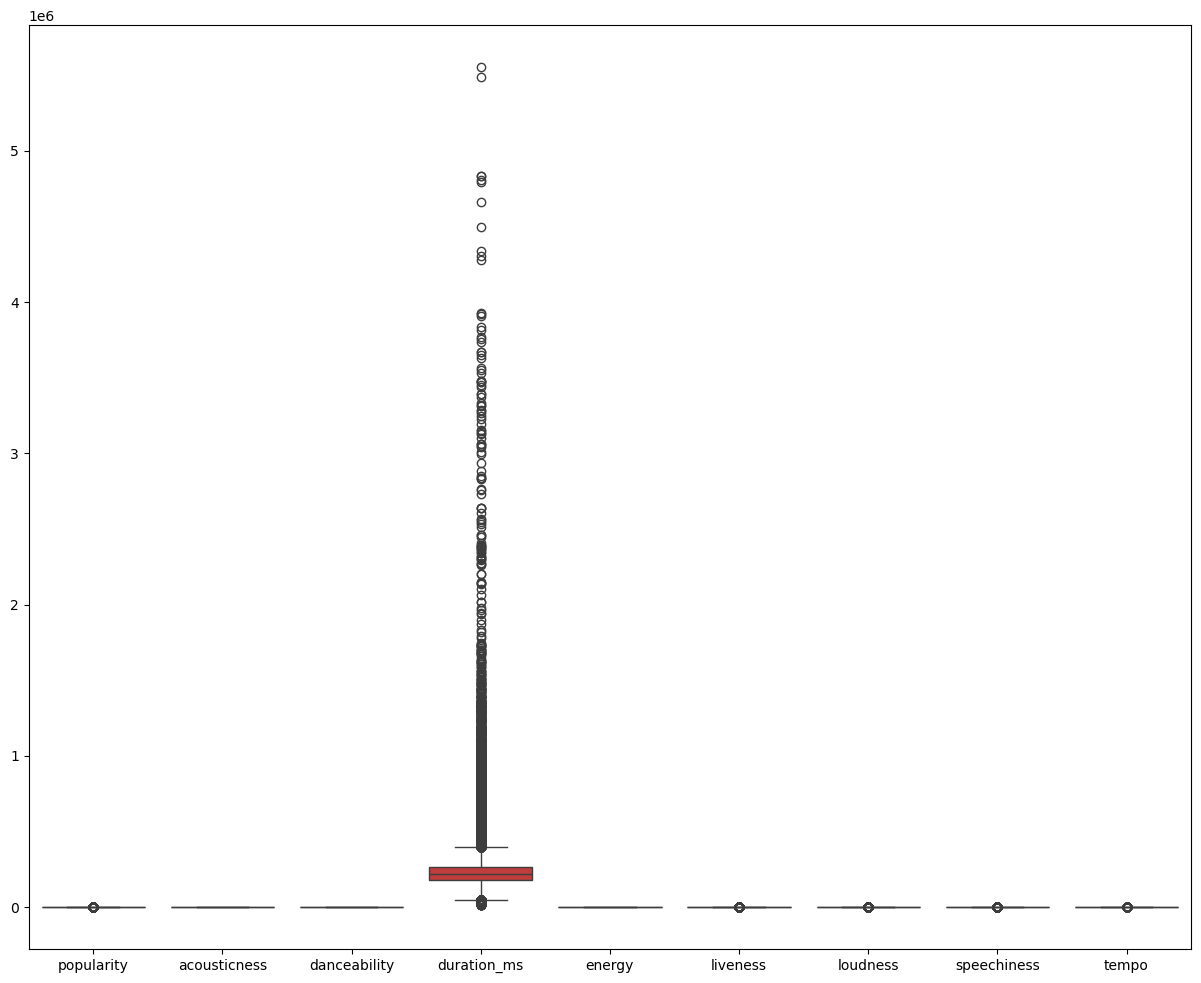

In [31]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df)

### Observations 
### There are many outliers in duration_ms
### and few in popularity , liveness , loudness , speechiness , tempo

In [42]:
# Detecting Actual Values of Outliers
def detect_outliers_iqr(data):
    outlier_list = []
    
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    IQR = q3 - q1
    
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    
    for i in data: 
        if (i < lwr_bound or i > upr_bound):
            outlier_list.append(i)
    
    return outlier_list 

# Apply outlier detection only on numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    outliers = detect_outliers_iqr(df[col])
    print("Outliers in", col, "attribute:", len(outliers))

Outliers in popularity attribute: 149
Outliers in acousticness attribute: 0
Outliers in danceability attribute: 0
Outliers in duration_ms attribute: 11651
Outliers in energy attribute: 0
Outliers in liveness attribute: 18560
Outliers in loudness attribute: 10066
Outliers in speechiness attribute: 27683
Outliers in tempo attribute: 110


In [44]:
def cap_floor_outliers(df, column):

    # Calculate the first and third quartiles
    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)
    
    # Calculate the IQR
    IQR = q3 - q1
    
    # Define lower and upper bounds
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    
    # Apply capping and flooring
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
    return df

numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    df = cap_floor_outliers(df, col)

# Now df will have outliers capped and floored.

In [48]:
# Rechecking for any outliers 
# Apply outlier detection only on numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    outliers = detect_outliers_iqr(df[col])
    print("Outliers in", col, "attribute:", len(outliers))

Outliers in popularity attribute: 0
Outliers in acousticness attribute: 0
Outliers in danceability attribute: 0
Outliers in duration_ms attribute: 0
Outliers in energy attribute: 0
Outliers in liveness attribute: 0
Outliers in loudness attribute: 0
Outliers in speechiness attribute: 0
Outliers in tempo attribute: 0


### Now all Outliers are Removed

## Apply data encoding technique on artist_name

In [53]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'artist_name' column
df['artist_name_encoded'] = label_encoder.fit_transform(df['artist_name'])

# Display the DataFrame with the new encoded column
print(df[['artist_name', 'artist_name_encoded']])

                     artist_name  artist_name_encoded
0                 Henri Salvador                 5181
1              Martin & les fées                 8254
2                Joseph Williams                 6451
3                 Henri Salvador                 5181
4                   Fabien Nataf                 4074
...                          ...                  ...
190984              Muddy Waters                 8914
190985        Bobby "Blue" Bland                 1633
190986  Jr Thomas & The Volcanos                 6508
190987              Muddy Waters                 8914
190988            Mint Condition                 8701

[190989 rows x 2 columns]


In [55]:
# now restoring artist name in its original place
df['artist_name'] = df['artist_name_encoded']

In [57]:
df.head()

artist_name  popularity  acousticness  danceability  duration_ms  energy  \
0         5181         0.0         0.611         0.389      99373.0   0.910   
1         8254         1.0         0.246         0.590     137373.0   0.737   
2         6451         3.0         0.952         0.663     170267.0   0.131   
3         5181         0.0         0.703         0.240     152427.0   0.326   
4         4074         4.0         0.950         0.331      82625.0   0.225   

   liveness  loudness  speechiness    tempo  artist_name_encoded  
0    0.3460    -1.828       0.0525  166.969                 5181  
1    0.1510    -5.559       0.0868  174.003                 8254  
2    0.1030   -13.879       0.0362   99.488                 6451  
3    0.0985   -12.178       0.0395  171.758                 5181  
4    0.2020   -21.150       0.0456  140.576                 4074

# Univarient Analysis

In [60]:
def bar_pie_plot(target_variable):
    # Count the occurrences of each gender using Seaborn
    counts = sns.countplot(x=df[target_variable])

    # Extract the counts from the Seaborn plot (just to demonstrate the method)
    counts_data = df[target_variable].value_counts()

    # Create a pie chart using the counts
    plt.figure(figsize=(6, 6))
    plt.pie(counts_data, labels=counts_data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    plt.title(f' {target_variable}  Distribution')
    plt.show()
bar_pie_plot('artist_name')

In [62]:
df['artist_name'].value_counts()

artist_name
4736     1362
4678     1105
6980      971
9323      825
14047     800
         ... 
6857        1
1537        1
10253       1
432         1
6508        1
Name: count, Length: 14564, dtype: int64

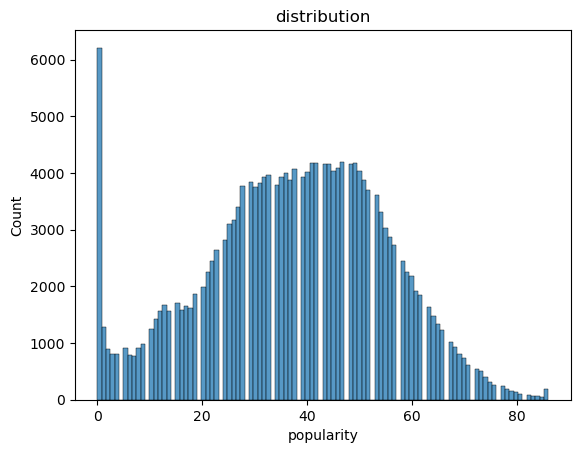

In [64]:
sns.histplot(df.popularity)
plt.title('distribution')
plt.show()

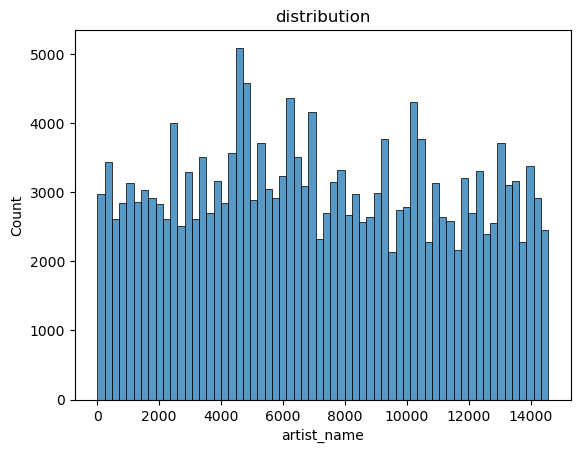

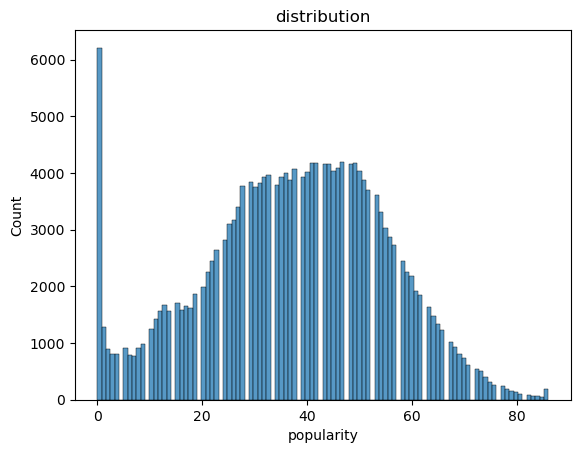

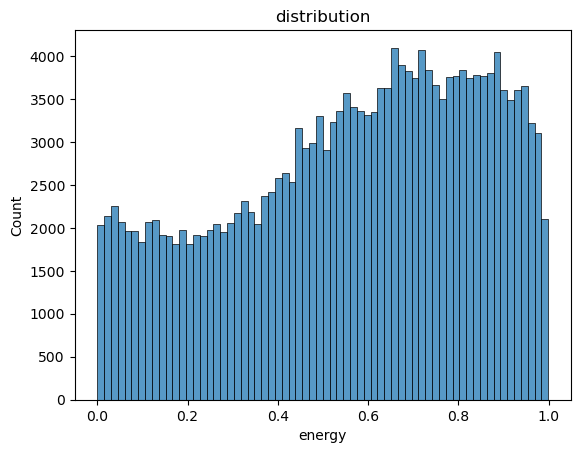

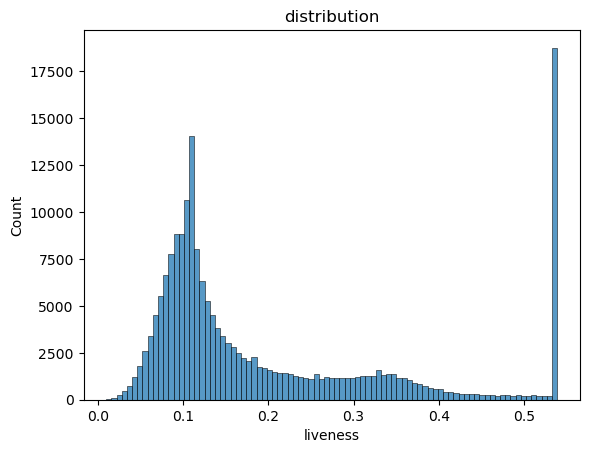

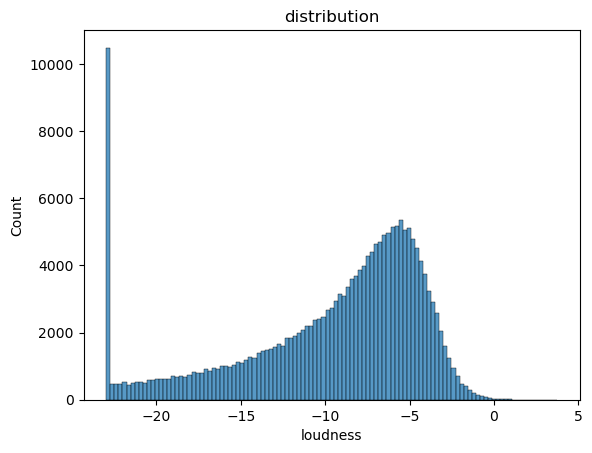

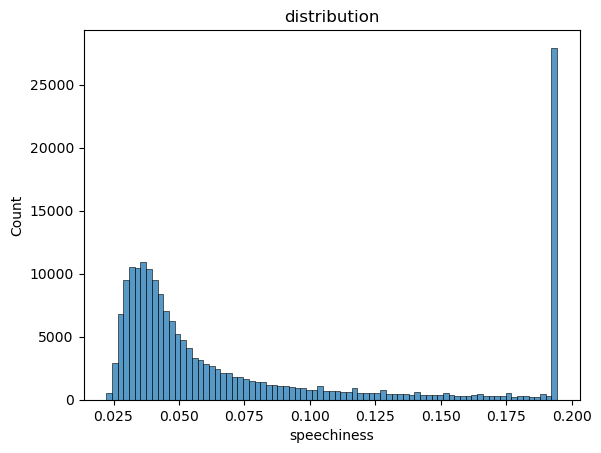

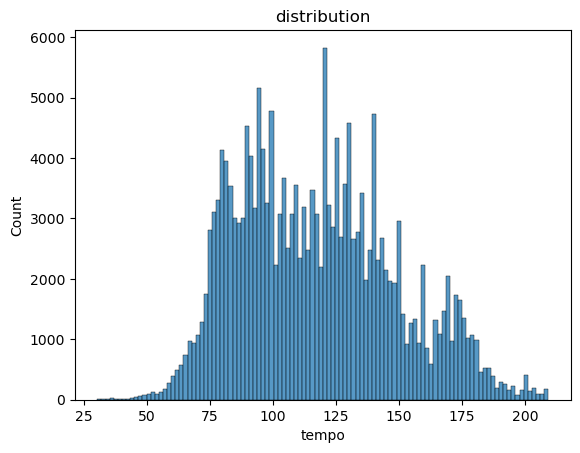

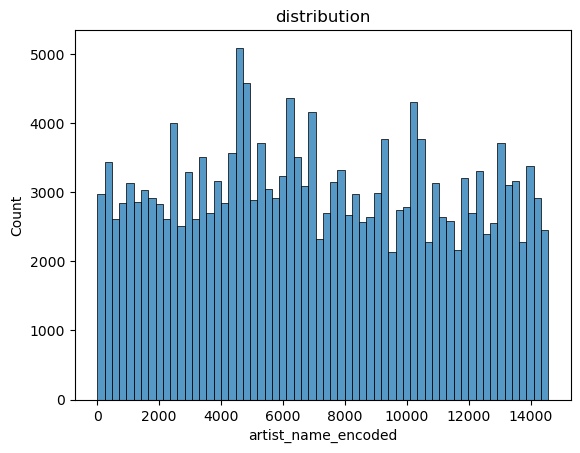

In [72]:
for attribute in df:
    sns.histplot(df[attribute])
    plt.title('distribution')
    plt.show()

# MUlTIVARIENT ANALYSIS

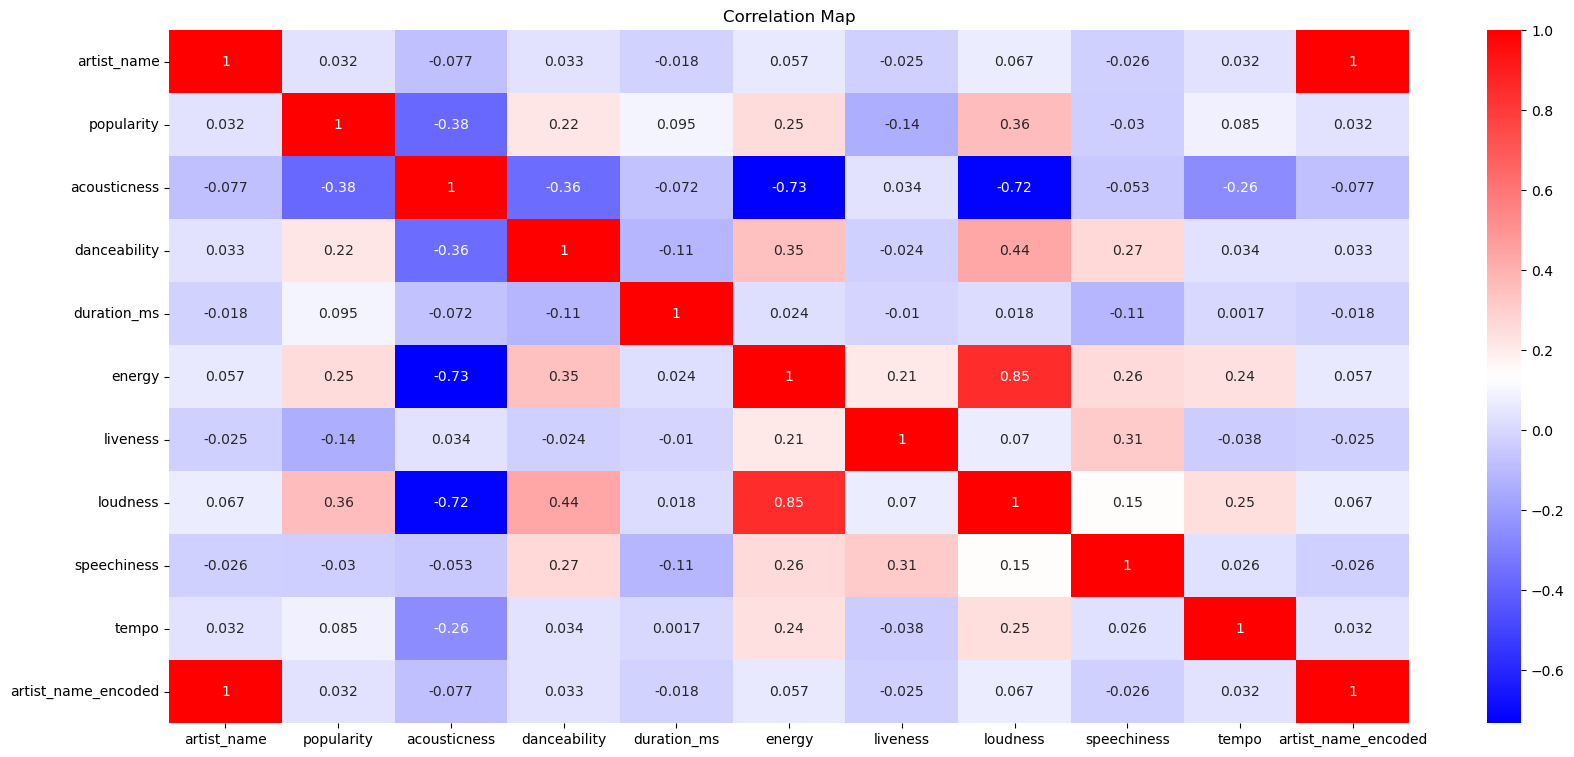

In [75]:
plt.figure(figsize=(20,9))
sns.heatmap(df.corr(), annot=True, cmap='bwr')
plt.title("Correlation Map")
plt.show()

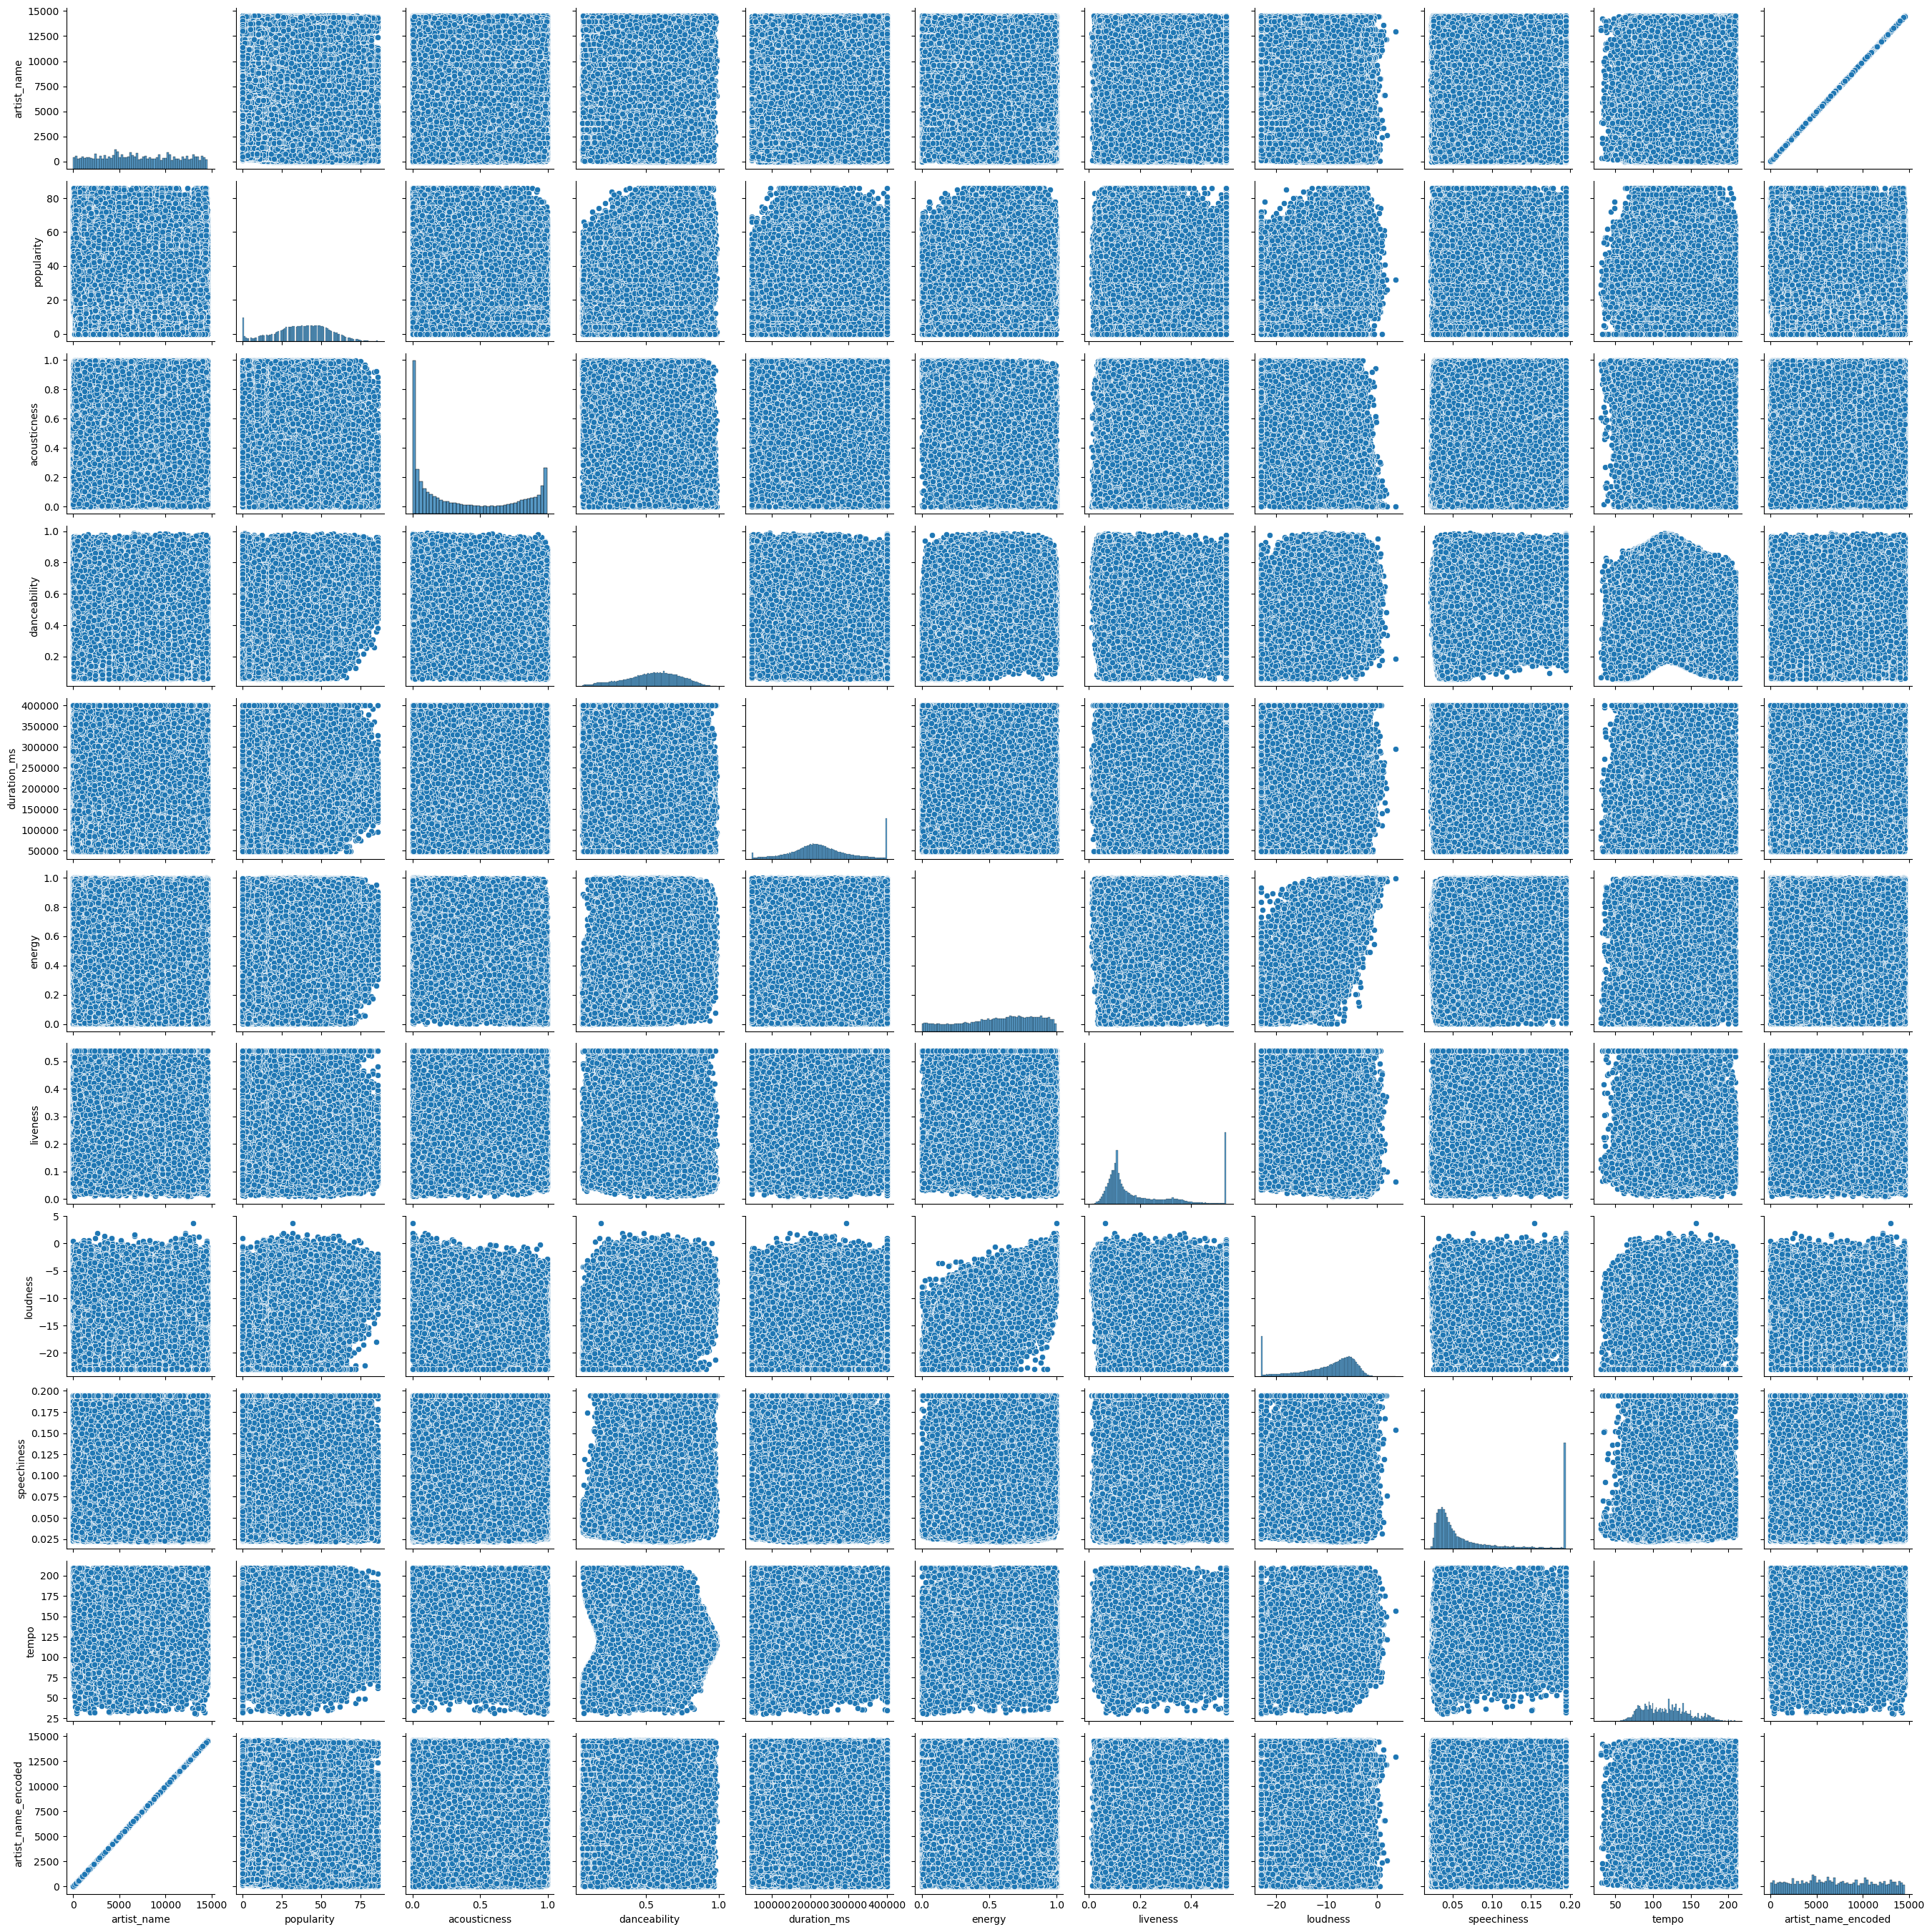

In [77]:
sns.pairplot(df)
plt.show()

# Data Splitting

In [82]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['popularity'])  # Features
y = df['popularity']  # Target variable
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)